In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_moons

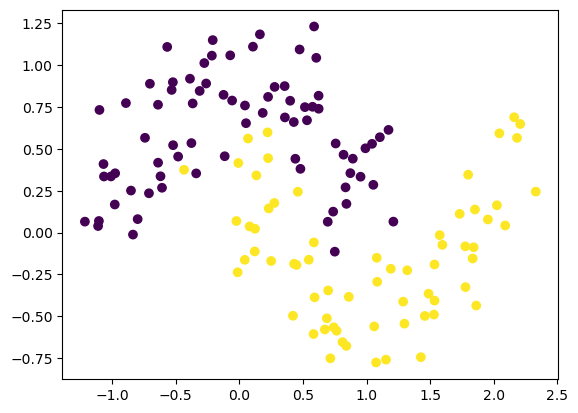

In [19]:
#Problem 1 a)

X,y = make_moons(n_samples=200, noise=0.2, random_state=None)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420) 
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

c = 0.05


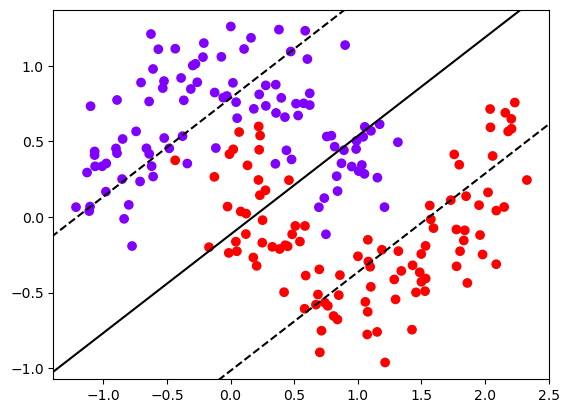

c = 0.1


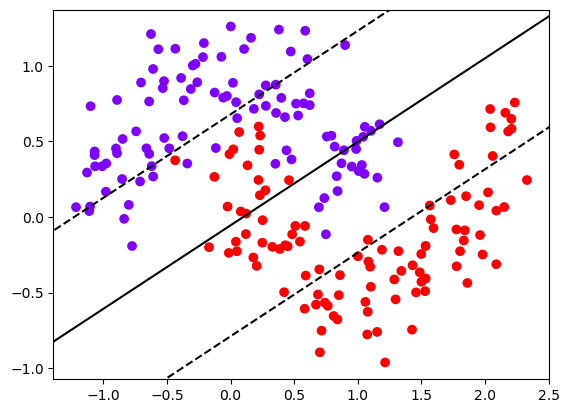

c = 1


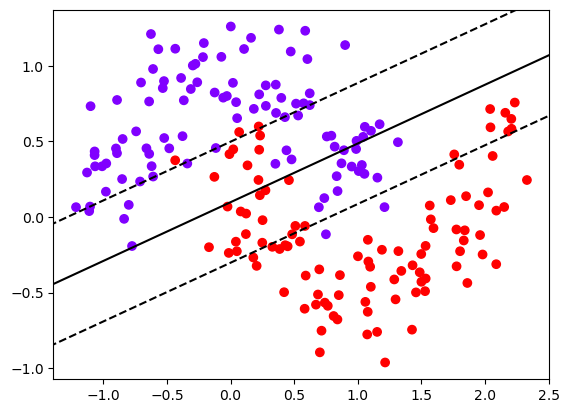

c = 2


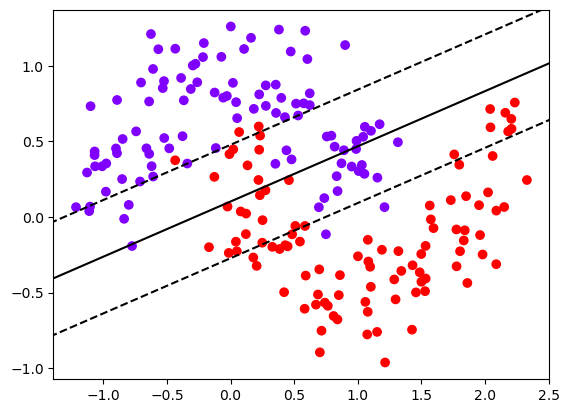

c = 5


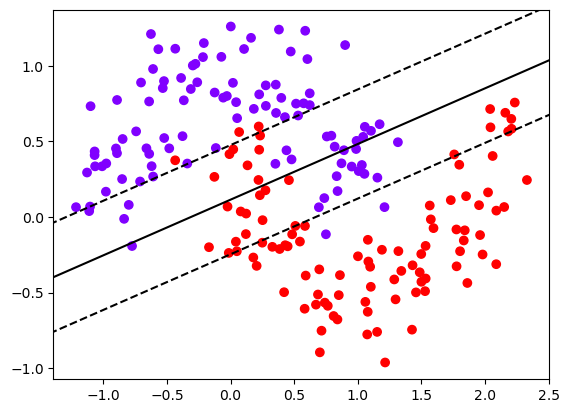

c = 10


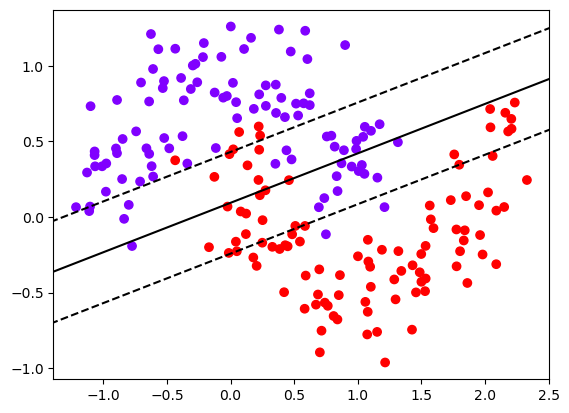

c = 50


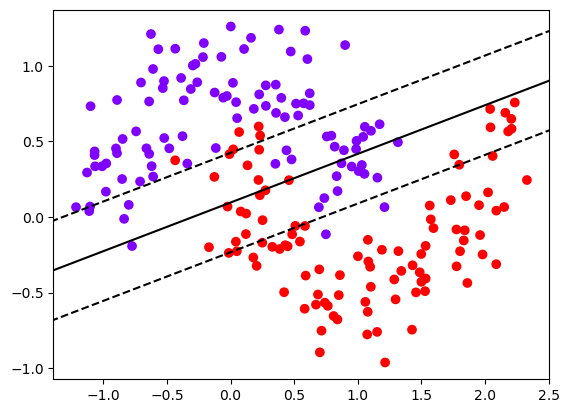

c = 100


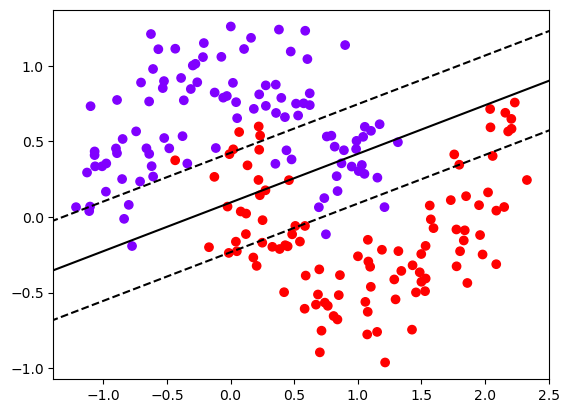

In [27]:
#Problem 1 b)

param_C = [0.05,0.1,1,2,5,10,50,100]

for i in range (8):
    model = svm.SVC(kernel='linear',C=param_C[i])
    clf = model.fit(X, y)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

    #get the axes instance on the current figure
    ax = plt.gca()

    #get the current x,y-axis limits in data coordinates
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim()
    x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
    y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    xy = np.c_[XX.ravel(), YY.ravel()]
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    print("c =",param_C[i])
    plt.show()


When c increases, there is less error and margin. But when c is greater than 1, the error and margin doesn't improve, which means that there could be under/overfitting

linear Accuracy: 0.8666666666666667


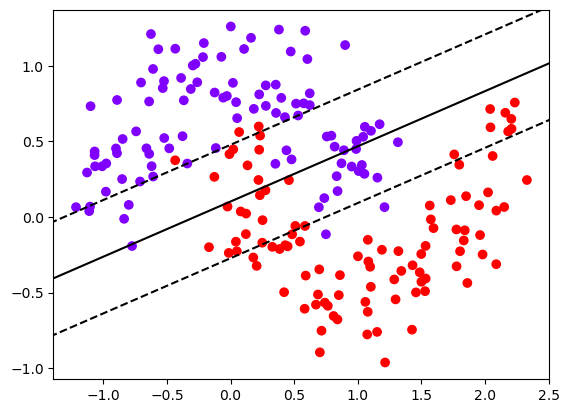

poly Accuracy: 0.8


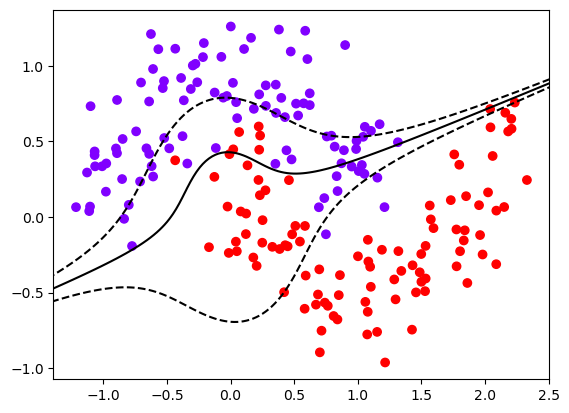

rbf Accuracy: 0.9666666666666667


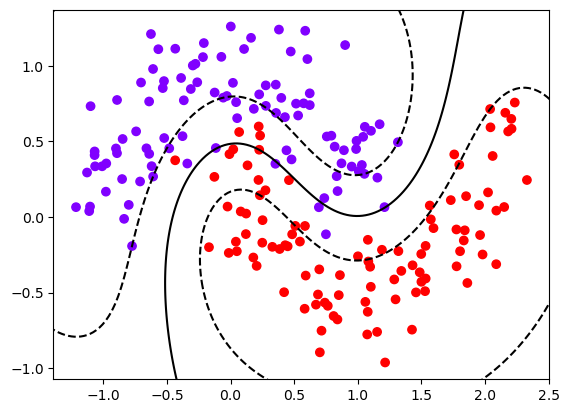

sigmoid Accuracy: 0.6333333333333333


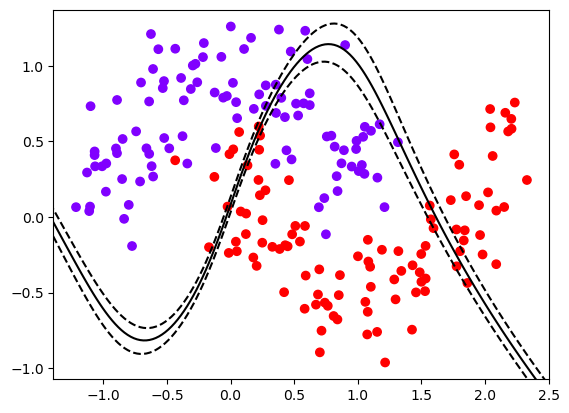

In [32]:
#Problem 1 c)

kernels = ['linear','poly','rbf','sigmoid']

for i in range (4):
    model = svm.SVC(kernel=kernels[i],C=2)
    clf = model.fit(X, y)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

    #get the axes instance on the current figure
    ax = plt.gca()

    #get the current x,y-axis limits in data coordinates
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim()
    x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
    y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    xy = np.c_[XX.ravel(), YY.ravel()]
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    clf.fit(X_train, Y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print(kernels[i], "Accuracy:",metrics.accuracy_score(Y_test, y_pred))

    # print("kernel :",kernels[i])
    plt.show()

the rbf has the highest accuracy of ~0.96666

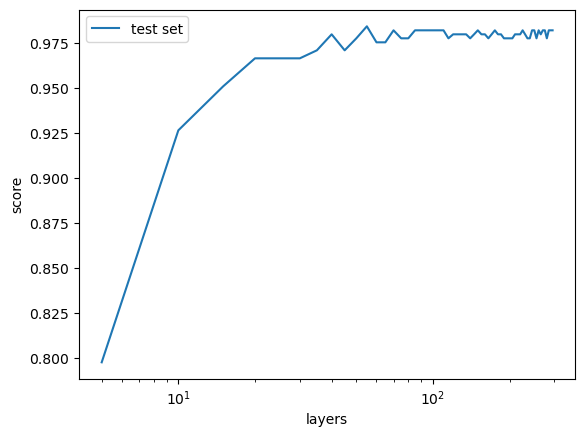

In [35]:
#Problem 2 c)

from sklearn.neural_network import MLPClassifier
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
Y = digits.target

tr_X, te_X, tr_Y, te_Y = train_test_split(X, Y, test_size=0.25, random_state=5)

test_score = []
layers = list(range(5,300,5)) 
for i in layers:
   MLP = MLPClassifier(activation = 'logistic', 
                       solver = 'sgd', 
                       hidden_layer_sizes = (i,), 
                       alpha=1e-2, 
                       max_iter = 400,
                       learning_rate_init = 0.1)
   MLP.fit(tr_X,tr_Y)
   test_score.append(MLP.score(te_X,te_Y))

plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()
plt.xscale("log")

In [36]:
layers[test_score.index(max(test_score))]

55